In [2]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.9 MB/s eta 0:00:00


In [3]:
import torch
import numpy as np
import warnings
import matplotlib.pyplot as plt
import torchvision as tv
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from torchmetrics import Accuracy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm.autonotebook import tqdm
import cv2
import os
from tqdm import tqdm

In [4]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [5]:
ds_mnist = tv.datasets.MNIST("./datasets", download=True, transform=trans)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18027471.20it/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 508209.05it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4480452.07it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11140660.10it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



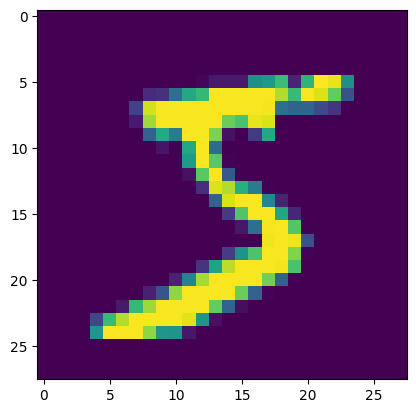

In [6]:
ds_mnist[0][0].numpy()[0]
plt.imshow(ds_mnist[0][0].numpy()[0])

In [7]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(ds_mnist, batch_size = batch_size, shuffle=True,
                                         num_workers=1, drop_last=True
                                         )

In [8]:
for img, label in dataloader:
  print(img.shape)
  print(label.shape)
  break

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


torch.Size([16, 1, 28, 28])
torch.Size([16])


In [31]:
class AI(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 10)
    self.act = nn.ReLU()



  def forward(self, x):
    out = self.flat(x)
    out = self.linear1(out)
    out = self.act(out)
    out = self.linear2(out)

    return out

In [80]:
model = AI()

In [81]:
loss_fn = nn.CrossEntropyLoss()

In [82]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [88]:
def accuracy(pred, label):
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1) #что сказала нс
  # print(f"Форма: {answer.shape}")
  # print(f"Ответ:{answer}")
  # print(f"Ответ:{answer.sum()}")
  return answer.min()

  0%|          | 0/3750 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
<ipython-input-88-d79e157de0c0>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1) #что сказала нс


0.1623068029516687
0.4634666666666667


  0%|          | 0/3750 [00:00<?, ?it/s]

0.14779356625415385
0.5053333333333333


  0%|          | 0/3750 [00:00<?, ?it/s]

0.13558033857395252
0.5338666666666667


  0%|          | 0/3750 [00:00<?, ?it/s]

0.12567435225881637
0.5586666666666666


  0%|          | 0/3750 [00:00<?, ?it/s]

0.11666697121510904
0.5808


  0%|          | 0/3750 [00:00<?, ?it/s]

0.10882872814896206
0.612


  0%|          | 0/3750 [00:00<?, ?it/s]

0.10210686053254953
0.6261333333333333


  0%|          | 0/3750 [00:00<?, ?it/s]

0.0960569135259216
0.6493333333333333


  0%|          | 0/3750 [00:00<?, ?it/s]

0.09088677944426114
0.6677333333333333


  0%|          | 0/3750 [00:00<?, ?it/s]

0.08578446655130635
0.6725333333333333


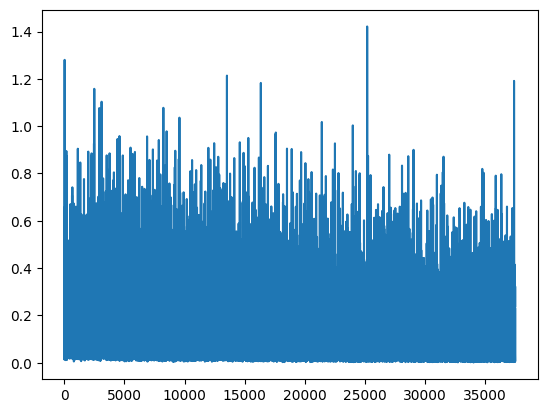

In [89]:
#обучение

epochs = 10
loss_collector = []
for epochs in range(epochs):
  loss_val = 0
  acc_val = 0
  for img, label in (pbar := tqdm(dataloader)):
    optimizer.zero_grad()

    label = nn.functional.one_hot(label, 10).float()
    pred = model(img)

    loss = loss_fn(pred, label)

    loss.backward()
    loss_item = loss.item()
    loss_val += loss_item
    loss_collector.append(loss_item)



    optimizer.step()

    acc_current = accuracy(pred, label)
    acc_val += acc_current

    pbar.set_description(f"loss: {loss_item:.4f}\taccuracy: {acc_current:.3f}")
  print(loss_val/len(dataloader))
  print(acc_val/len(dataloader))
plt.plot(loss_collector)
plt.show()

In [109]:
img = cv2.imread("img.png", cv2.IMREAD_GRAYSCALE) #img самому закинуть
dsize = (28, 28)
out = img

In [112]:

out = np.expand_dims(out, axis=0)
out = np.expand_dims(out, axis=0)
out = out.astype(np.float32)/255.0

In [113]:

out.shape

(1, 1, 1, 1, 28, 28)

In [114]:
t_out = torch.from_numpy(out)
test = model(t_out)

In [117]:
F.softmax(test).detach().numpy().argmax()

<ipython-input-117-271857624661>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(test).detach().numpy().argmax()


8